### Import Required Libraries
Import the necessary libraries, including matplotlib, keras, numpy, sklearn.

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### Load MNIST Dataset
Load the MNIST dataset using keras.datasets.

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Create a Subset Dataset
Create a new subset dataset for training and testing.

In [3]:
# Create a new subset dataset
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

### Check the dataset shape

In [4]:
X_train.shape, X_test.shape

((600, 28, 28), (100, 28, 28))

### Display the Length of Each Part
Display the length of subset training data and testing data.

In [5]:
# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Length of subset training data: 600
Length of subset testing data: 100


In [6]:
# Display the number of instances for each class in the training set
for i in range(10):
    print(f"Number of instances for class {i} in training set: {sum(y_train == i)}")

# Display the number of instances for each class in the test set
for i in range(10):
    print(f"Number of instances for class {i} in test set: {sum(y_test == i)}")

# Display the length of the subset training data
print(f"Length of subset training data: {len(X_train)}")

# Display the length of the subset testing data
print(f"Length of subset testing data: {len(X_test)}")

Number of instances for class 0 in training set: 60
Number of instances for class 1 in training set: 60
Number of instances for class 2 in training set: 60
Number of instances for class 3 in training set: 60
Number of instances for class 4 in training set: 60
Number of instances for class 5 in training set: 60
Number of instances for class 6 in training set: 60
Number of instances for class 7 in training set: 60
Number of instances for class 8 in training set: 60
Number of instances for class 9 in training set: 60
Number of instances for class 0 in test set: 10
Number of instances for class 1 in test set: 10
Number of instances for class 2 in test set: 10
Number of instances for class 3 in test set: 10
Number of instances for class 4 in test set: 10
Number of instances for class 5 in test set: 10
Number of instances for class 6 in test set: 10
Number of instances for class 7 in test set: 10
Number of instances for class 8 in test set: 10
Number of instances for class 9 in test set: 10


### Display Random Images in a Grid
Display random images from the training set in a grid using matplotlib.

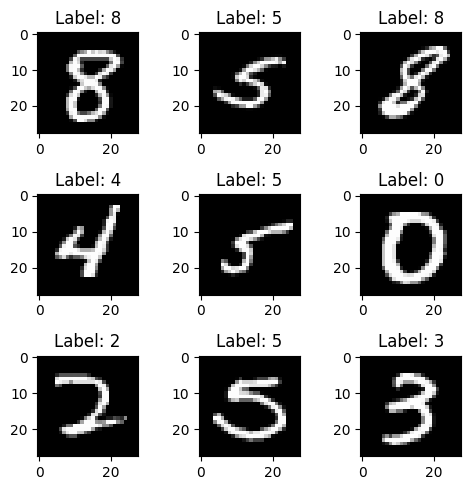

In [7]:
# Display random images in a grid
fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Create a 3x3 grid of subplots
for i, ax in enumerate(axes.flat):  # Loop over the flattened array of axes
    index = np.random.randint(0, X_train.shape[0])  # Generate a random index
    image = X_train[index]  # Get the image at the random index
    ax.imshow(image, cmap='gray')  # Display the image in grayscale
    ax.set_title(f'Label: {y_train[index]}')  # Set the title of the subplot to the label of the image
plt.tight_layout()  # Adjust the layout so that there are no overlaps
plt.show()  # Display the plot

### Flatten the Images
Flatten the images from the training and testing set.

In [8]:
# Flatten the images from the training and testing set
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

### Check the flattened dataset shape

In [9]:
X_train_flat.shape, X_test_flat.shape

((600, 784), (100, 784))

### Create and Train the Neural Network Classifier
Create and train the neural network classifier using keras.

In [10]:
# Create and train the neural network classifier
model = Sequential()  # Initialize the model
model.add(Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)))  # Add the first layer with 128 nodes and 'relu' activation function
model.add(Dense(64, activation='relu', input_shape=(X_train_flat.shape[1],)))  # Add the first layer with 128 nodes and 'relu' activation function
model.add(Dense(10, activation='softmax'))  # Add the output layer with 10 nodes (for 10 classes) and 'softmax' activation function

### Compile the model


In [11]:
model.compile(optimizer='adam',  # Use 'adam' optimizer
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' loss function
              metrics=['accuracy'])  # Use accuracy as the metric

### Train the model


In [12]:
model.fit(X_train_flat, y_train, epochs=20, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/20
19/19 [==============================] - 1s 3ms/step - loss: 39.1814 - accuracy: 0.4117
Epoch 2/20
19/19 [==============================] - 0s 2ms/step - loss: 5.1689 - accuracy: 0.8033
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 1.5448 - accuracy: 0.9067
Epoch 4/20
19/19 [==============================] - 0s 868us/step - loss: 0.6522 - accuracy: 0.9500
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.9750
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9917
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9933
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9967
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 2.5238e-04 - accuracy: 1.0000
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/20


### Evaluate Accuracy on the Train and Test Set
Evaluate the accuracy of the model on the train and test set.

In [13]:
# Evaluate accuracy on the train set
train_accuracy_nn = model.evaluate(X_train_flat, y_train, verbose=0)[1]
print(f"Neural Network Train Accuracy: {train_accuracy_nn}")
# Evaluate accuracy on the test set
test_accuracy_nn = model.evaluate(X_test_flat, y_test, verbose=0)[1]
print(f"Neural Network Test Accuracy: {test_accuracy_nn}")

Neural Network Train Accuracy: 1.0
Neural Network Test Accuracy: 0.7200000286102295


### Standardize the Data
Standardize the data using sklearn's StandardScaler.

In [14]:
# Standardize the data
scaler = StandardScaler()  # Initialize the StandardScaler
X_train_scaled = scaler.fit_transform(X_train_flat)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test_flat)  # Transform the testing data


### Create and Train the Neural Network Classifier on standardised Data
Create and train the neural network classifier on the standardized data.

In [15]:
# Create and train the neural network classifier on scaled data
model_scaled = Sequential()  # Initialize the model
model_scaled.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Add the first layer with 128 nodes and 'relu' activation function
model_scaled.add(Dense(64, activation='relu'))  # Add the second layer with 64 nodes and 'relu' activation function
model_scaled.add(Dense(10, activation='softmax'))  # Add the output layer with 10 nodes (for 10 classes) and 'softmax' activation function


### Compile the model


In [16]:
model_scaled.compile(optimizer='adam',  # Use 'adam' optimizer
                     loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' loss function
                     metrics=['accuracy'])  # Use accuracy as the metric


### Train the model


In [17]:
model_scaled.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/20
19/19 [==============================] - 0s 1ms/step - loss: 1.6304 - accuracy: 0.4833
Epoch 2/20
19/19 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.8750
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9500
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9850
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9917
Epoch 6/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9983
Epoch 7/20
19/19 [==============================] - 0s 868us/step - loss: 0.0302 - accuracy: 1.0000
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 11/20
19/19

### Evaluate Accuracy on the Train and Test Set


In [18]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_nn_scaled = model_scaled.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Evaluate the model on the scaled training set
print(f"Neural Network Scaled Train Accuracy: {train_accuracy_nn_scaled}")  # Print the training accuracy

# Evaluate accuracy on the test set using scaled data
test_accuracy_nn_scaled = model_scaled.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Evaluate the model on the scaled testing set
print(f"Neural Network Scaled Test Accuracy: {test_accuracy_nn_scaled}")  # Print the testing accuracy

Neural Network Scaled Train Accuracy: 1.0
Neural Network Scaled Test Accuracy: 0.800000011920929


### Apply Min-Max Scaling to the Training and Test Data
Apply Min-Max scaling to the training and test data using sklearn's MinMaxScaler.

In [19]:
# Initialize the MinMaxScaler
mmscaler = MinMaxScaler()

# Fit and transform the training data
X_train_mmscaled = mmscaler.fit_transform(X_train_flat)

# Transform the testing data
X_test_mmscaled = mmscaler.transform(X_test_flat)

### Define the model for min-max scaled dataset

In [20]:
# Create and train the neural network classifier on min-max scaled data
model_mmscaled = Sequential()  # Initialize the model
model_mmscaled.add(Dense(128, activation='relu', input_shape=(X_train_mmscaled.shape[1],)))  # Add the first layer with 128 nodes and 'relu' activation function
model_mmscaled.add(Dense(64, activation='relu'))  # Add the second layer with 64 nodes and 'relu' activation function
model_mmscaled.add(Dense(10, activation='softmax'))  # Add the output layer with 10 nodes (for 10 classes) and 'softmax' activation function


### Compile the model

In [21]:
# Compile the model
model_mmscaled.compile(optimizer='adam',  # Use 'adam' optimizer
                     loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' loss function
                     metrics=['accuracy'])  # Use accuracy as the metric


### Evaluate Accuracy on the Train and Test Set Using Scaled Data
Evaluate the accuracy of the model on the train and test set using the standardized data.

In [22]:
# Train the model
model_mmscaled.fit(X_train_mmscaled, y_train, epochs=20, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/20
19/19 [==============================] - 1s 1ms/step - loss: 1.9656 - accuracy: 0.4483
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 1.0900 - accuracy: 0.7900
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.8767
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.9183
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9350
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9483
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9733
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9900
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9950
Epoch 10/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9933
Epoch 11/20
19/19 [

In [23]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_nn_mmscaled = model_mmscaled.evaluate(X_train_mmscaled, y_train, verbose=0)[1]  # Evaluate the model on the min-max scaled training set
print(f"Neural Network Min-Max Scaled Train Accuracy: {train_accuracy_nn_mmscaled}")  # Print the training accuracy

# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_nn_mmscaled = model_mmscaled.evaluate(X_test_mmscaled, y_test, verbose=0)[1]  # Evaluate the model on the min-max scaled testing set
print(f"Neural Network Min-Max Scaled Test Accuracy: {test_accuracy_nn_mmscaled}")  # Print the testing accuracy

Neural Network Min-Max Scaled Train Accuracy: 1.0
Neural Network Min-Max Scaled Test Accuracy: 0.8100000023841858
